In [9]:
from dehaze import dehaze
from config import config
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [10]:
haze_path = '../../data/aerial.png'

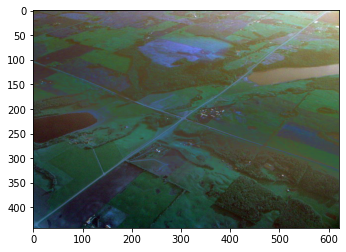

In [11]:
plt.imshow(dehaze(haze_path, config))

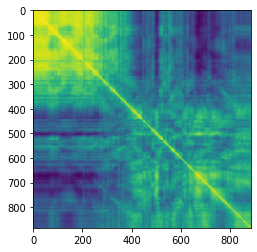

In [12]:
I = cv2.imread(haze_path)
hsvI = cv2.cvtColor(I, cv2.COLOR_BGR2HSV)
s = hsvI[:,:,1]
v = hsvI[:,:,2]
diff_sv = np.corrcoef(v,s)
plt.imshow(diff_sv)

In [95]:
diff_sv[:50,550:]

array([[ 0.07473012,  0.09182515,  0.0926608 , ..., -0.31847964,
        -0.29455843, -0.25051049],
       [ 0.07783208,  0.09540732,  0.0948194 , ..., -0.33510836,
        -0.30625383, -0.25763684],
       [ 0.0675822 ,  0.08806523,  0.09297841, ..., -0.35132377,
        -0.32062983, -0.2736344 ],
       ...,
       [ 0.0932188 ,  0.11061786,  0.10658842, ..., -0.38326508,
        -0.36509528, -0.31220738],
       [ 0.09427354,  0.11545656,  0.11726816, ..., -0.38097618,
        -0.3599251 , -0.31348709],
       [ 0.0772003 ,  0.10201786,  0.11512362, ..., -0.39360976,
        -0.36360708, -0.32036513]])